Dataset - https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Problem Statement

    Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

    Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Attributes

    - People
        - ID: Customer's unique identifier
        - Year_Birth: Customer's birth year
        - Education: Customer's education level
        - Marital_Status: Customer's marital status
        - Income: Customer's yearly household income
        - Kidhome: Number of children in customer's household
        - Teenhome: Number of teenagers in customer's household
        - Dt_Customer: Date of customer's enrollment with the company
        - Recency: Number of days since customer's last purchase
        - Complain: 1 if the customer complained in the last 2 years, 0 otherwise


    - Products
        - MntWines: Amount spent on wine in last 2 years
        - MntFruits: Amount spent on fruits in last 2 years
        - MntMeatProducts: Amount spent on meat in last 2 years
        - MntFishProducts: Amount spent on fish in last 2 years
        - MntSweetProducts: Amount spent on sweets in last 2 years
        - MntGoldProds: Amount spent on gold in last 2 years

    - Promotion
        - NumDealsPurchases: Number of purchases made with a discount
        - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
        - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
        - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
        - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
        - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
        - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

    - Place
        - NumWebPurchases: Number of purchases made through the company’s website
        - NumCatalogPurchases: Number of purchases made using a catalogue
        - NumStorePurchases: Number of purchases made directly in stores
        - NumWebVisitsMonth: Number of visits to company’s website in the last month

# 1. Importing Dependencies

In [585]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.tools as tls
pd.set_option('display.max_columns', 40)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore")

# 2. Loading and Initial Data Exploration 

In [ ]:
# Loading the data
df = pd.read_csv('Dataset/marketing_campaign.csv', sep = '\t')

In [ ]:
# Printing first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# dtype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [589]:
# Statistical info for each numerical attribute
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [590]:
# Number of null values in each columns
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [591]:
# Number of duplicated rows
df.duplicated().sum()

np.int64(0)

In [592]:
# Number of rows and columns 
df.shape

(2240, 29)

#### Key Findings from the initial Data Exploration

            1. Number of Rows and Columns 
                -> Number of rows = 2240 
                -> Number of columns = 29

            2. Missing Values 
                -> There are 24 missing values in column Income. Rest of the columns do not have any missing values
                -> We would remove these 24 values by dropping respective rows. 
            
            3. Duplicate Rows 
                -> There are zero duplicate rows 

            4. Outliers 
                -> There are outliers in column Income


# 3 Data Cleaning and Feature Engineering

In [ ]:
# Making a copy of the data before transformation
data = df.copy()

In [596]:
# Converting 'Dt_Customer' into DateTime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format = '%d-%m-%Y')

data['Age'] = data['Dt_Customer'].max().year - data['Year_Birth']

days = [] 
for i in data['Dt_Customer']:
    delta = max(data['Dt_Customer']) - i # Subtracting two days gives time delta 
    days.append(delta) 

data['Customer_For'] = days
data['Customer_For'] = data['Customer_For'].dt.days 

In [594]:
# Unique values in each categorical attribute
for column in data.select_dtypes('object'):
    print(data[column].value_counts())
    print('\n')

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Dt_Customer
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 663, dtype: int64




In [ ]:
# Reducing the number of categories in column 'Education' and 'Marital_Status'
data['Education'] = data['Education'].replace(['PhD', 'Master'], 'Postgraduate')
data['Education'] = data['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
data['Education'] = data['Education'].replace(['Basic'], 'Undergraduate')

data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'Partner')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

for column in data.select_dtypes('object'):
    print(data[column].value_counts())
    print('\n')


Education
Graduate         1330
Postgraduate      856
Undergraduate      54
Name: count, dtype: int64


Marital_Status
Partner    1444
Single      796
Name: count, dtype: int64


Dt_Customer
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 663, dtype: int64




In [ ]:
# Combining Columns to Create New Features
data['Children'] = data['Kidhome'] + data['Teenhome']
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
# df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
data['TotalNumPurchases'] = data["NumWebPurchases"] + data["NumStorePurchases"]

In [ ]:
# Useless Columns
data[["Z_CostContact", "Z_Revenue"]].nunique()

Z_CostContact    1
Z_Revenue        1
dtype: int64

Columns ID, Z_CostContact, Z_Revenue are useless for creating clusters as they don't provide any information. ID is different for every customer and columns Z_CostContact, Z_Revenue have same value for each customers. So we drop all three columns.

In [ ]:
# Dropping Useless Columns
data.drop(columns = ['Dt_Customer', "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"], axis = 1, inplace = True)

In [600]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Column with null values
print(data.isna().sum()[data.isna().sum() > 0])

# Removes the row with null values
data.dropna(inplace = True)

data.reset_index(inplace = True)
data.drop(columns = 'index', inplace = True)

Income    24
dtype: int64


In [602]:
# Categorize columns into three groups based on their data type

binary_columns = [col for col in data.columns if data[col].nunique() == 2]
categorical_columns = [col for col in data.columns if 2 < data[col].nunique() < 10]
numerical_columns = [col for col in data.select_dtypes(include=['number']).columns 
                     if col not in binary_columns + categorical_columns]

#### Removing Outliers Using Z-Score

Different Ways of Removing Outliers
https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/

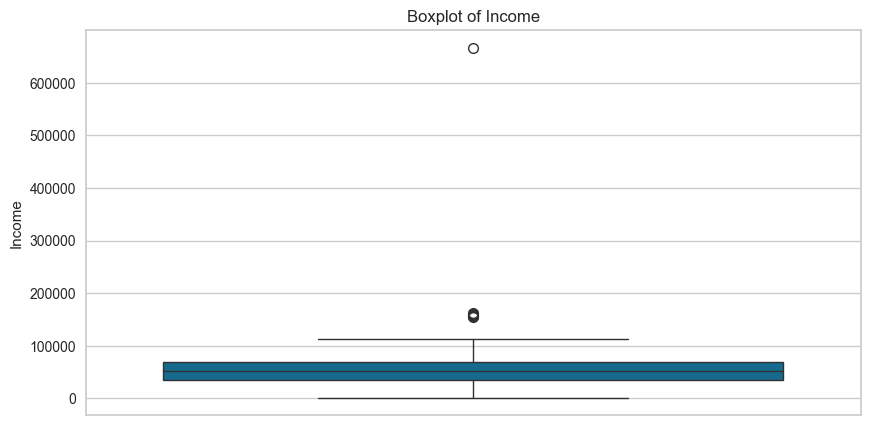

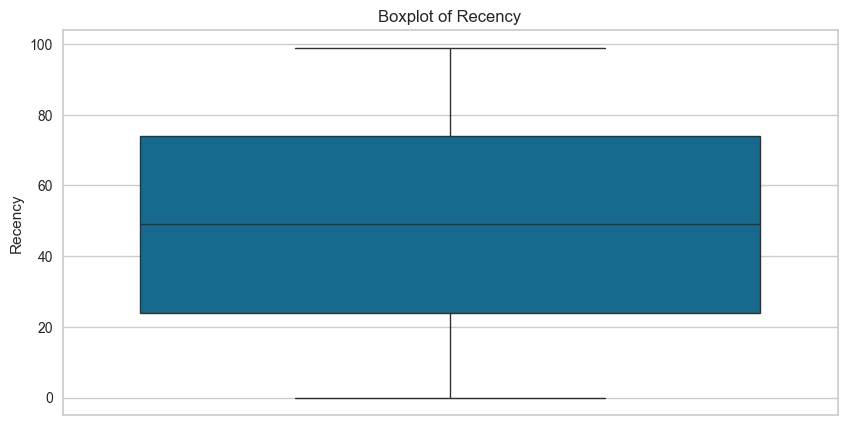

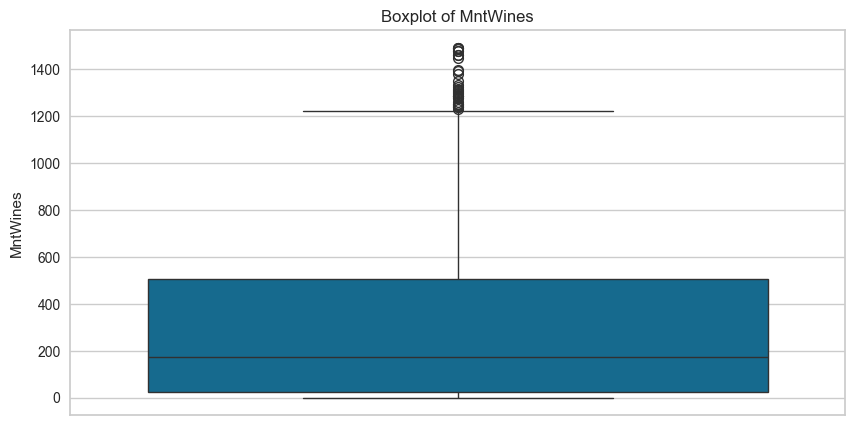

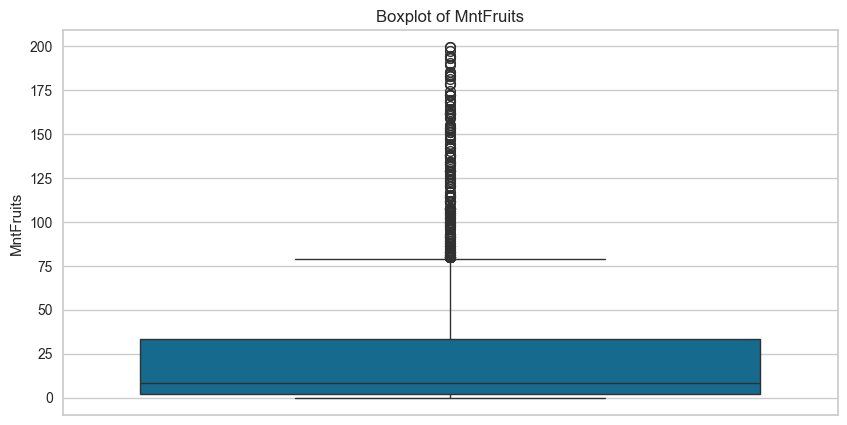

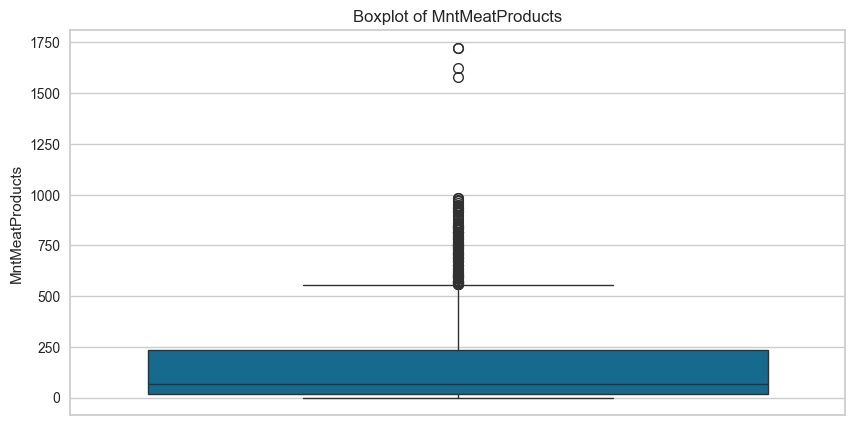

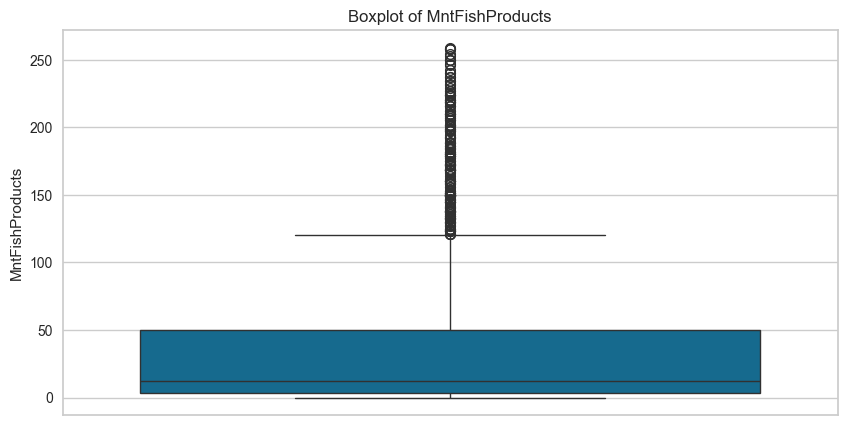

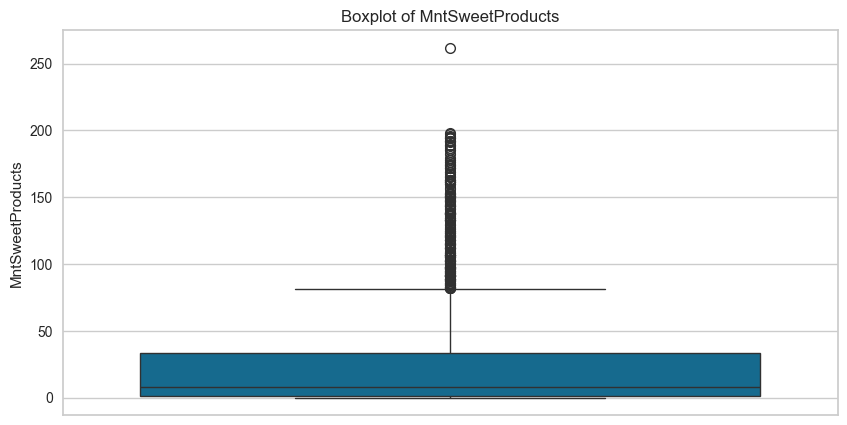

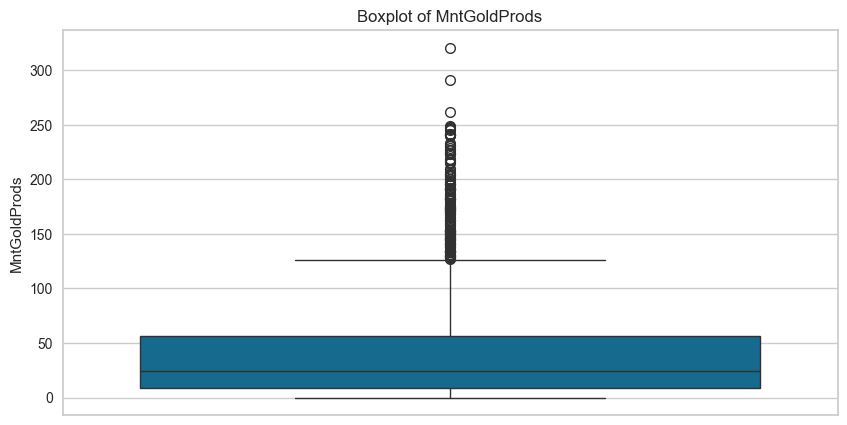

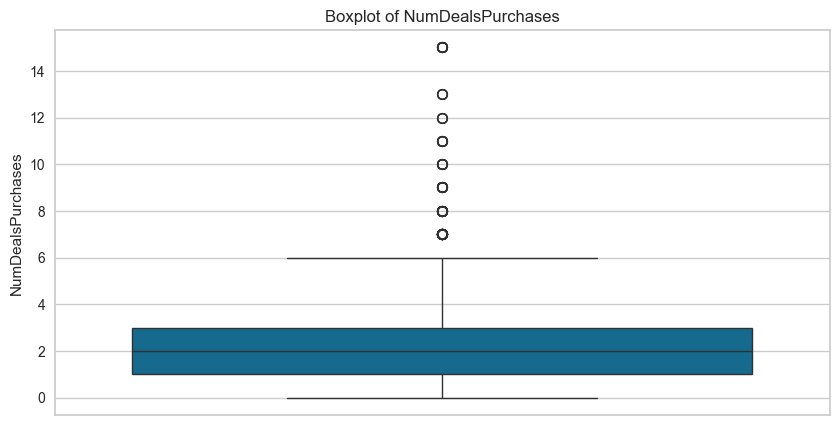

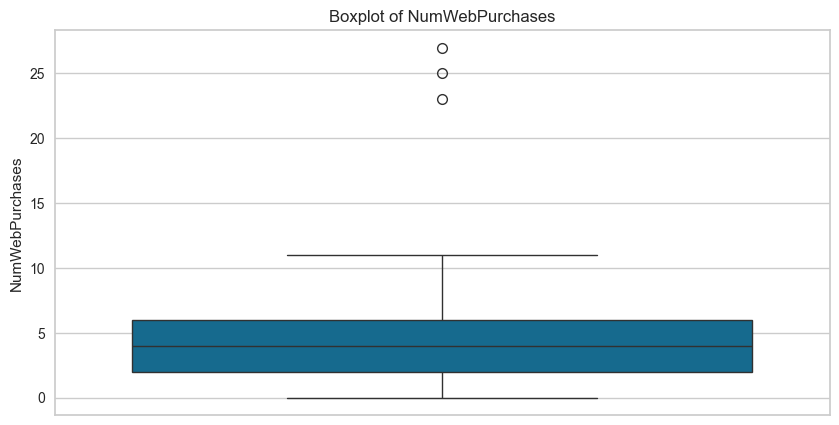

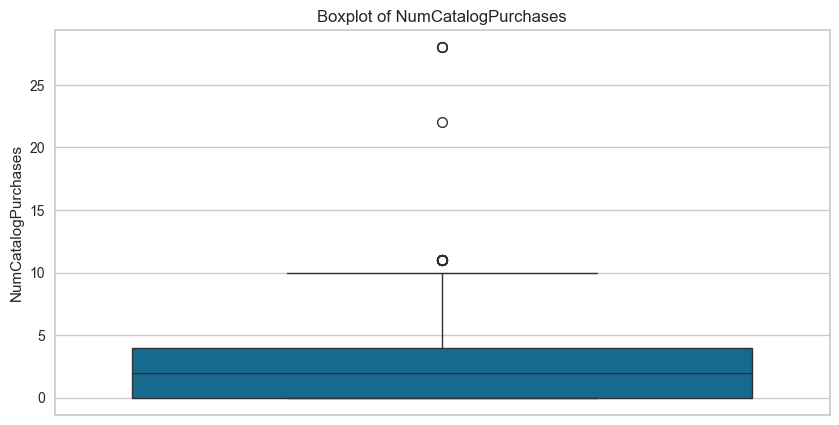

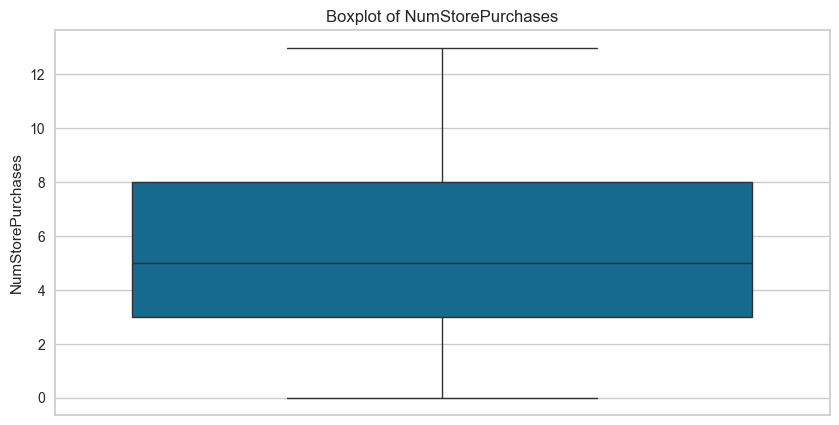

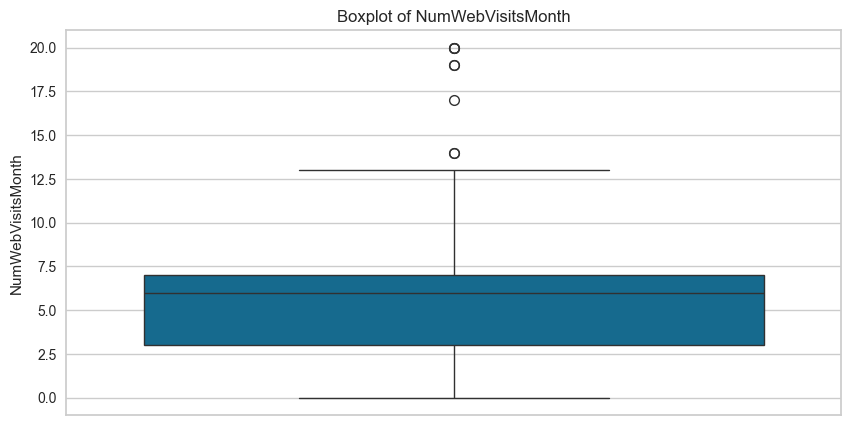

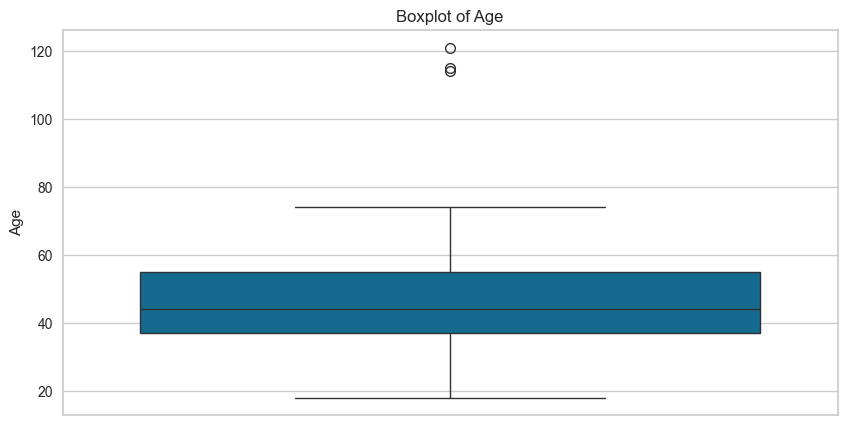

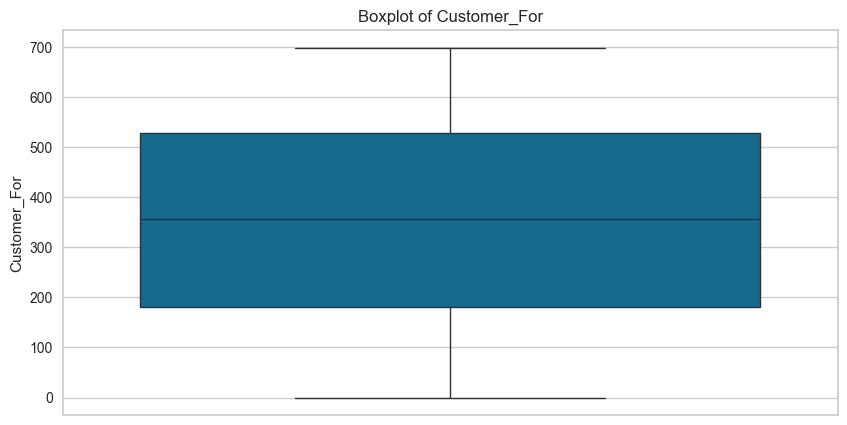

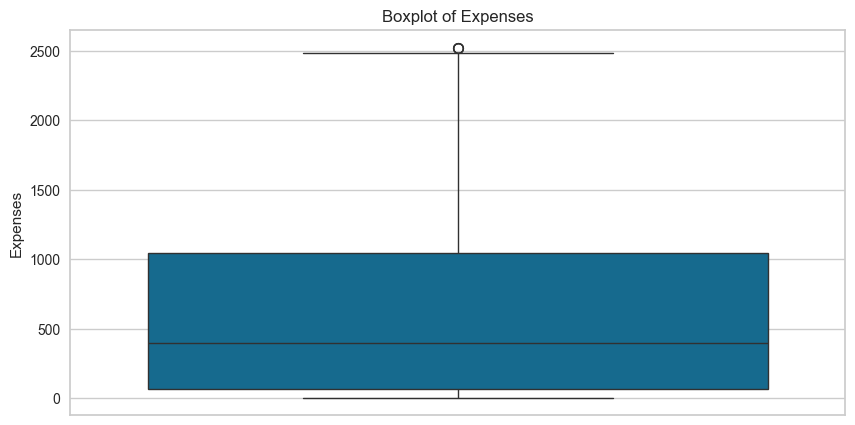

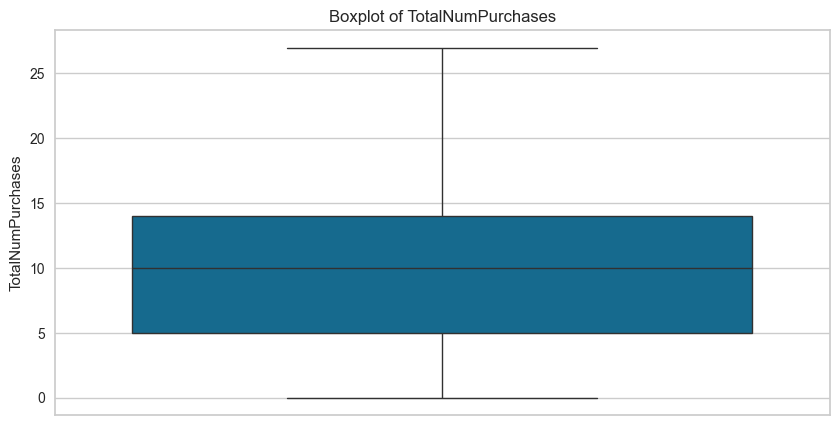

In [603]:
# Boxplot for each numerical column
for column in numerical_columns: 
    plt.figure(figsize = (10, 5))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
# data[numerical_columns].plot(kind = 'box')

In [604]:
## Detecting Outliers

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(data[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_For,Expenses,TotalNumPurchases
count,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000,2216.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.007,-1.693,-0.905,-0.662,-0.745,-0.688,-0.658,-0.849,-1.208,-1.491,-0.913,-1.785,-2.194,-2.268,-1.747,-0.999,-1.893
25%,-0.673,-0.864,-0.833,-0.612,-0.673,-0.633,-0.634,-0.675,-0.688,-0.761,-0.913,-0.862,-0.956,-0.683,-0.857,-0.893,-0.936
50%,-0.034,-0.000,-0.387,-0.461,-0.441,-0.468,-0.463,-0.376,-0.168,-0.031,-0.229,-0.246,0.281,-0.098,0.010,-0.349,0.022
75%,0.647,0.863,0.593,0.167,0.291,0.226,0.145,0.232,0.352,0.699,0.454,0.677,0.693,0.820,0.867,0.732,0.788
max,24.413,1.727,3.522,4.339,6.948,4.044,5.722,5.348,6.591,8.362,8.656,2.215,6.054,6.327,1.707,3.182,3.277


Z-scores above 3 and less than -3 are considered outliers, which could skew our clustering results and should be removed. This is particularly crucial in the Income column, where the highest Z-score exceeds 24.

In [605]:
# The rows with outliers 
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]
print("Number of rows with outliers = ", len(outliers))
z_scores[np.abs(z_scores > 3).any(axis = 1)]

Number of rows with outliers =  264


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_For,Expenses,TotalNumPurchases
9,-1.851572,0.656053,-0.821616,-0.662463,-0.717986,-0.669306,-0.633880,-0.597742,-0.688176,-1.125881,-0.912837,-1.784893,6.054474,1.570611,-1.213115,-0.925860,-1.701749
11,0.428560,1.139782,-0.329403,0.870781,1.395890,3.422786,2.069298,-0.269580,-0.688176,-0.396043,0.454182,0.676607,-1.368784,0.819538,-0.630080,0.821091,0.213280
20,-1.978761,-0.242301,-0.901675,-0.637328,6.948158,-0.669306,-0.633880,-0.829385,6.591050,-1.490800,8.656301,-1.784893,-1.781187,-0.849514,0.916447,1.862958,-1.893251
38,1.103163,-1.589832,0.343685,1.247808,1.645630,0.810424,3.676593,1.120281,-0.168231,1.428553,1.137692,-0.246455,-0.543978,-0.932967,0.358116,1.307185,0.596286
42,1.100382,0.794261,-0.539928,3.459700,0.441524,3.459322,0.072356,2.510143,-0.688176,-0.760962,0.454182,0.984294,-1.781187,-0.599157,-1.741800,0.625327,0.213280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,1.433511,-0.242301,0.634269,1.122132,3.090558,1.011375,-0.000703,0.174403,-0.688176,0.698715,-0.229327,0.984294,-1.368784,-1.016420,-1.035240,1.685442,0.979292
2191,-1.865201,-1.278863,-0.869059,-0.561922,-0.713526,-0.669306,-0.585174,-0.752171,-1.208121,-1.125881,-0.912837,-1.784893,3.167651,-0.599157,-0.096454,-0.954063,-1.701749
2194,1.183466,0.172324,0.079787,4.213754,0.936545,2.034398,2.385886,0.251618,-1.208121,-0.031124,1.137692,0.368919,-1.781187,1.737516,-1.326758,1.040082,0.213280
2209,24.413282,-0.898791,-0.877954,-0.310571,-0.664470,-0.541428,-0.633880,-0.617045,0.871658,-0.396043,-0.571082,-0.861830,0.280829,-0.682609,0.190123,-0.904293,-0.744234


In [606]:
# Number of outliers in each column

# np.count_nonzero counts the number of non zero values 
# True is treated as 1 and False is treated as 0. 
# So it counts the number of True.
for i, column in enumerate(numerical_columns): 
    print(f'Number of outliers in column {column} = ', np.count_nonzero(np.abs(z_scores) > 3, axis = 0)[i])

Number of outliers in column Income =  8
Number of outliers in column Recency =  0
Number of outliers in column MntWines =  15
Number of outliers in column MntFruits =  64
Number of outliers in column MntMeatProducts =  39
Number of outliers in column MntFishProducts =  58
Number of outliers in column MntSweetProducts =  61
Number of outliers in column MntGoldProds =  46
Number of outliers in column NumDealsPurchases =  31
Number of outliers in column NumWebPurchases =  3
Number of outliers in column NumCatalogPurchases =  4
Number of outliers in column NumStorePurchases =  0
Number of outliers in column NumWebVisitsMonth =  9
Number of outliers in column Age =  3
Number of outliers in column Customer_For =  0
Number of outliers in column Expenses =  5
Number of outliers in column TotalNumPurchases =  1


In [607]:
## Removing Outliers

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# # Drop the rows containing outliers
data = data.drop(outliers.index)

In [608]:
data.shape

(1952, 30)

#### <b>Summary </b>

    1. Less number of categories:
            - In categorical attributes like 'Marital_Status' and 'Education' we reduced the number of categories.

    2. New Features were created using existing Features :
            - 'Customer_For' from 'Dt_Customer' 
            - 'Age' from 'Year_Birth' 
            - 'Children' from 'Kidhome' and 'Teenhome' 
            - 'Is_Parent' from 'Children'
            - 'Expenses' = 'MntWines' + 'MntFruits' + 'MntMeatProducts' + 'MntFishProducts' + 'MntSweetProducts' + 'MntGoldProds'
            - 'TotalNumPurchases' = "NumWebPurchases" + "NumStorePurchases"

    3. Dropping Columns that were not necessary: 
            - 'Dt_Customer' -> 'Column_For' column is more useful 
            - 'Year_Birth' -> 'Age' column is more useful 
            - 'ID' 
            - "Z_CostContact", "Z_Revenue" -> These 2 columns only have 1 value

    4. Removing Outliers:
            - 264 records with outliers were dropped

    5. Number of records and attributes 
            - rows = 1952
            - columns = 30

# 4. Exploratory Data Analysis(EDA)

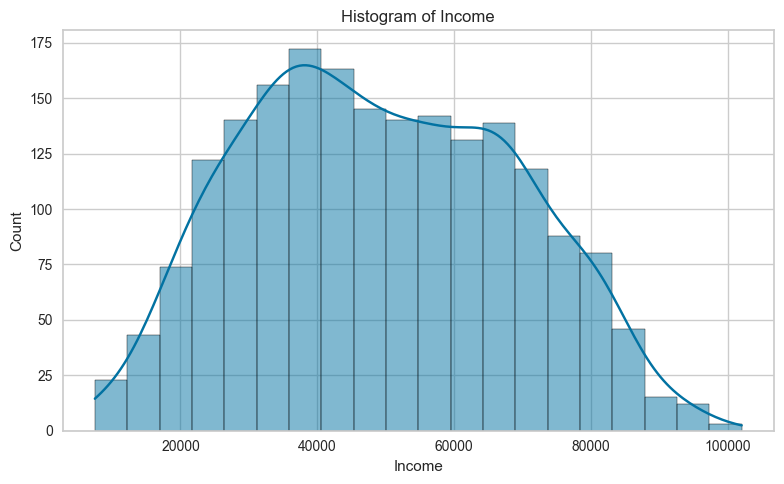

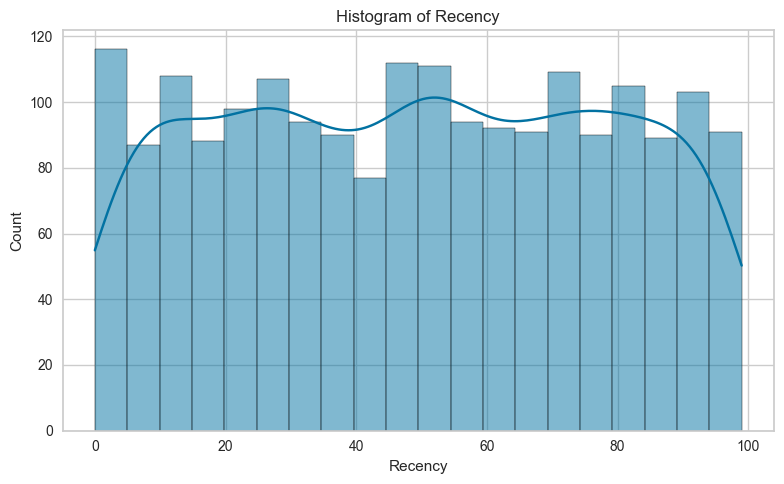

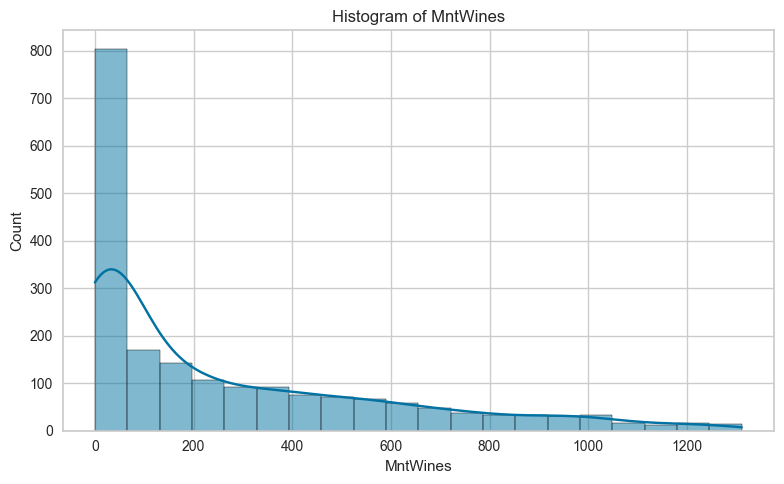

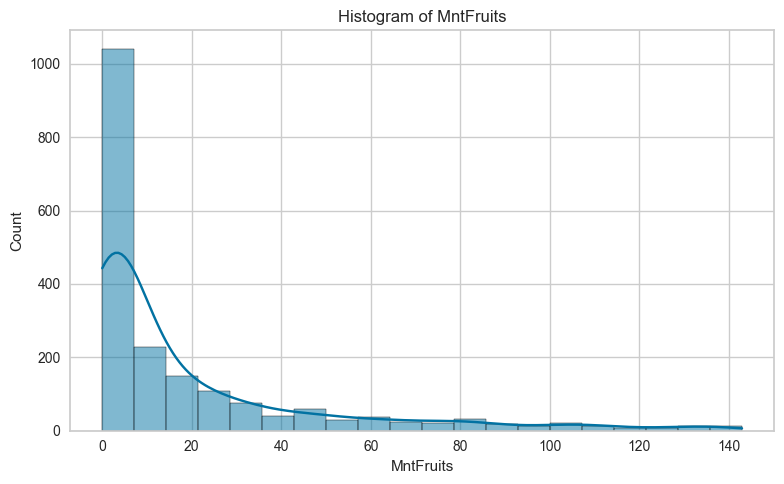

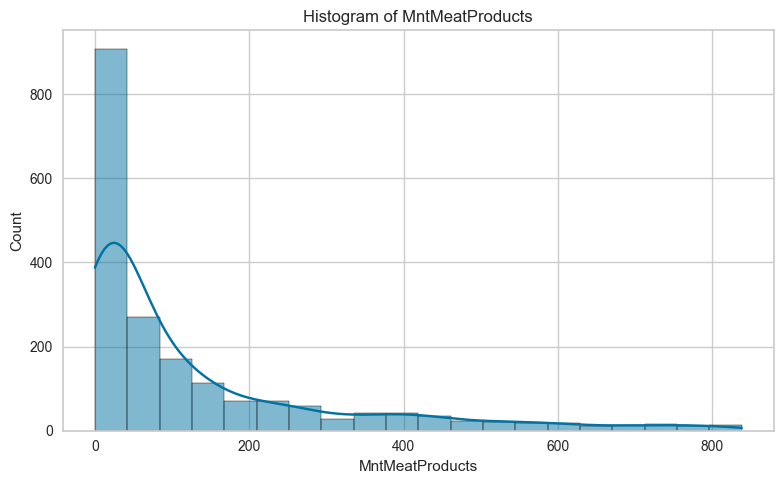

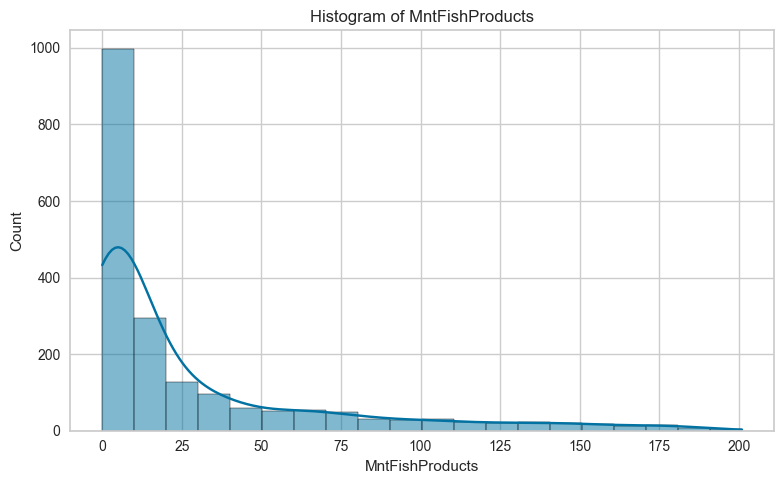

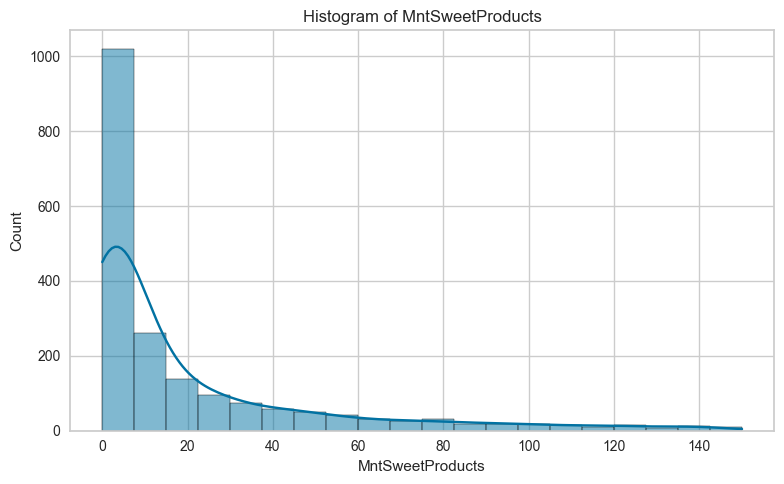

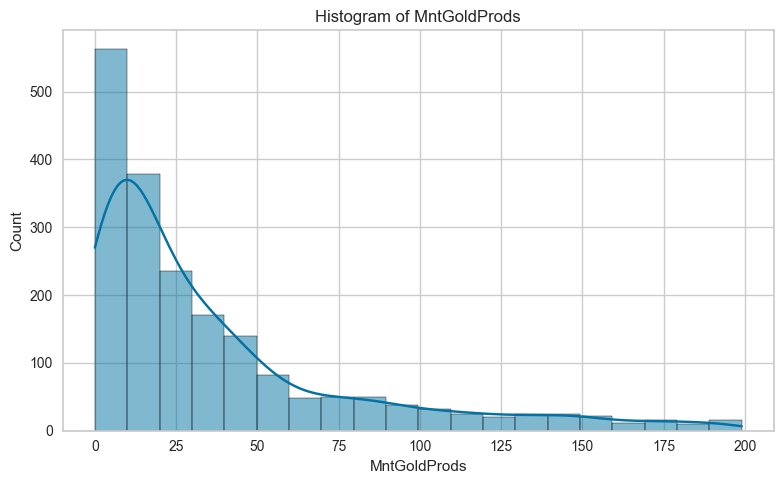

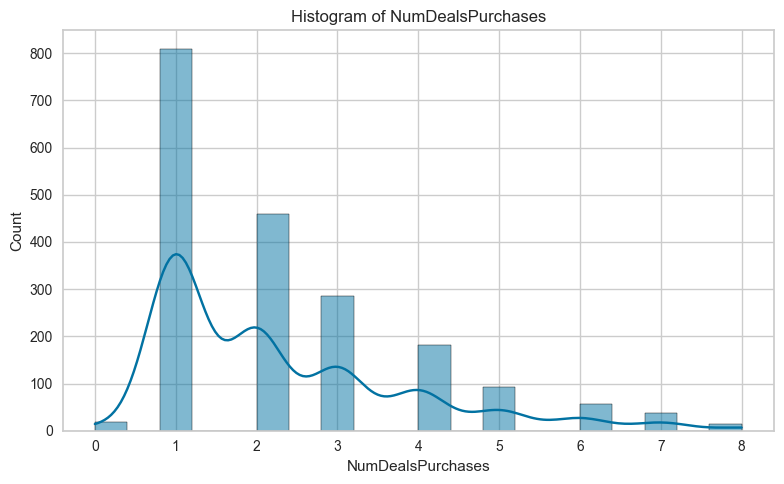

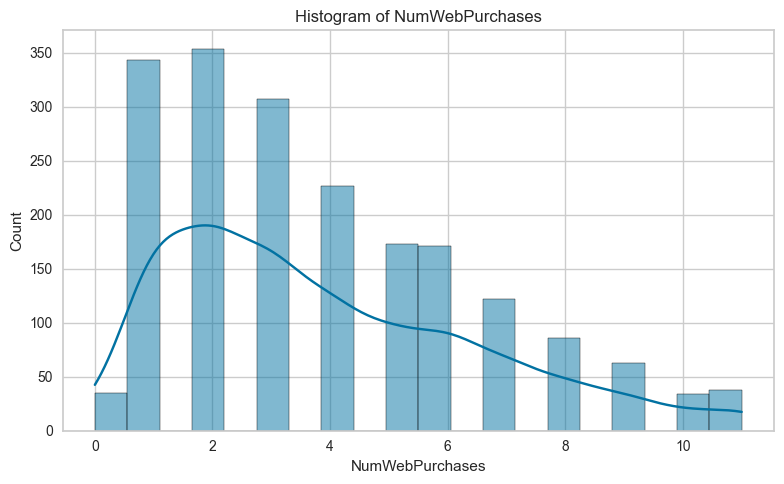

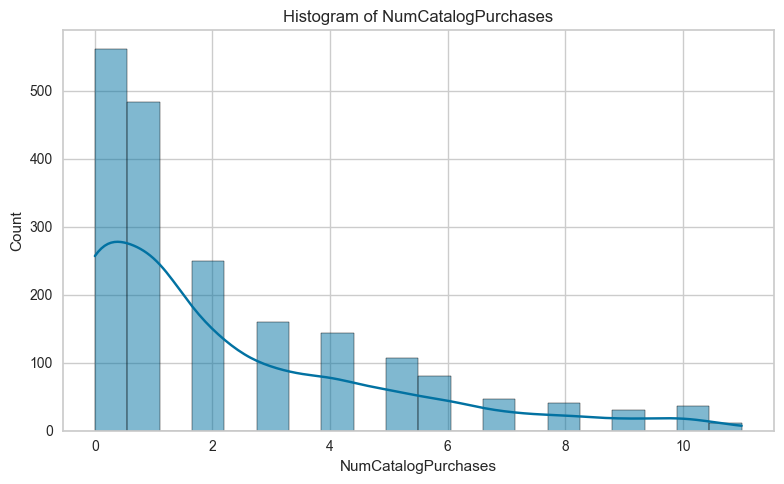

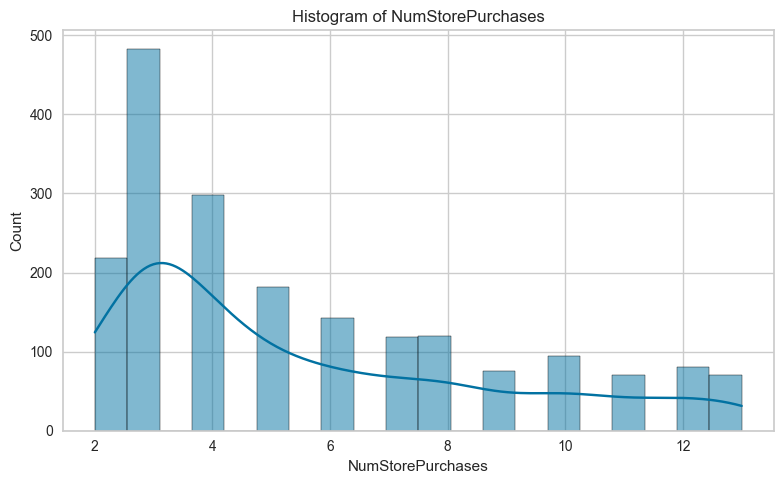

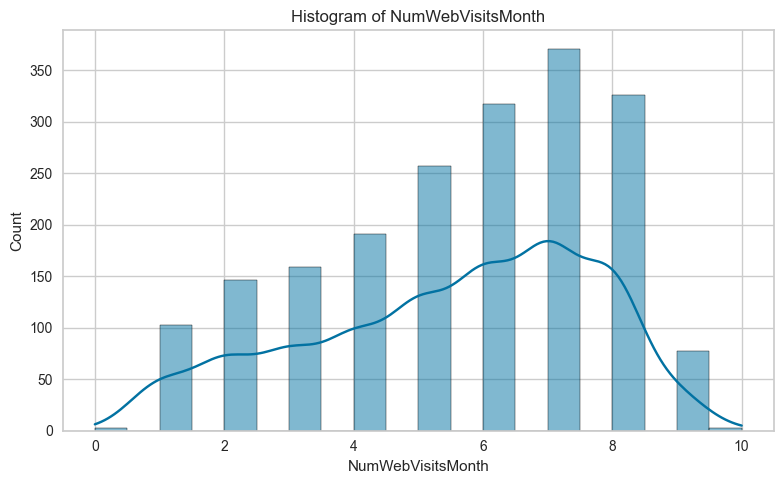

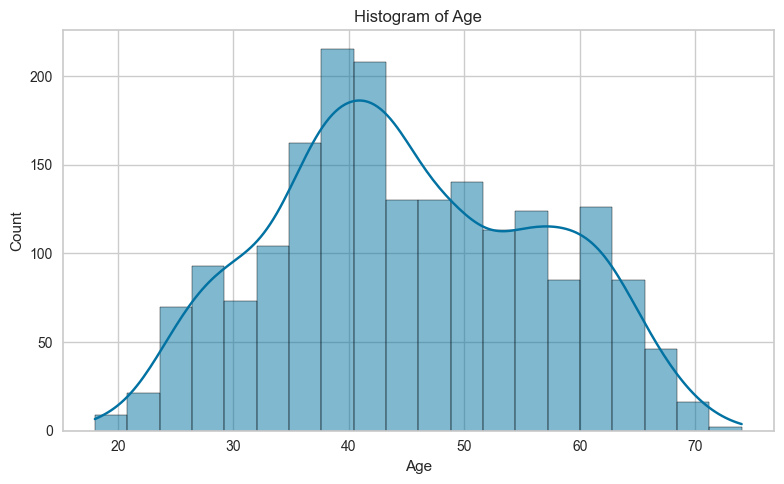

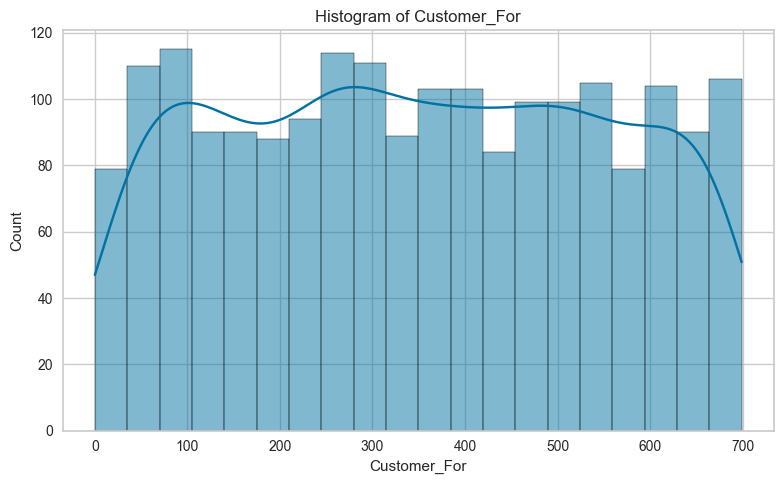

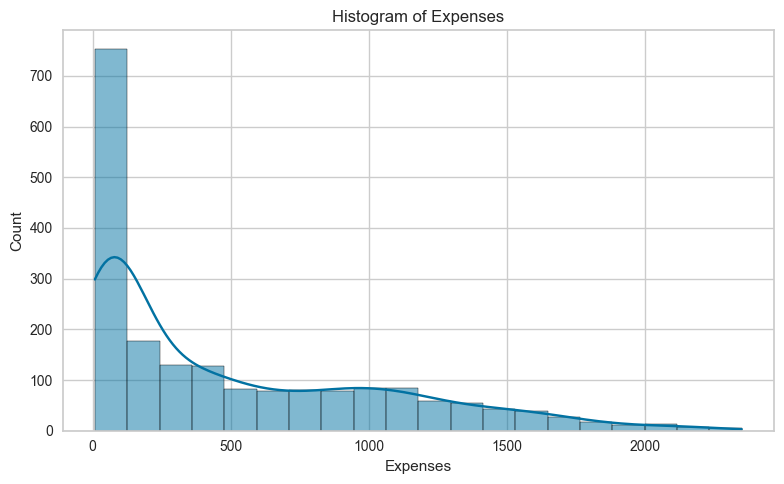

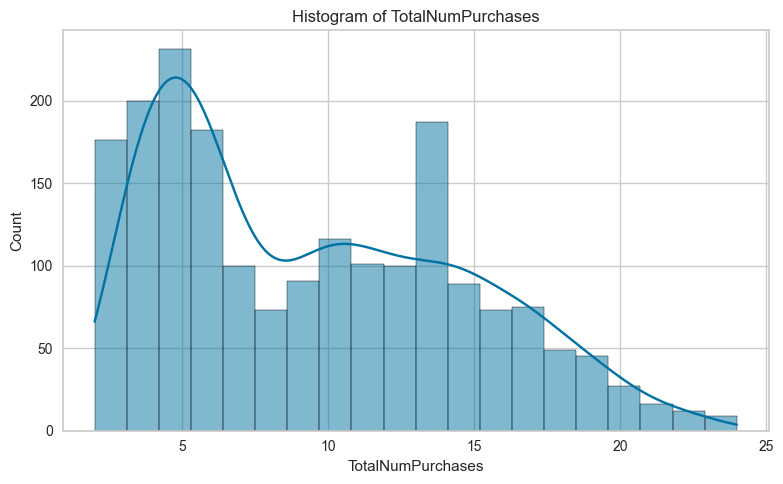

In [609]:
# Plot histograms for each numerical column
for column in numerical_columns:
   
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

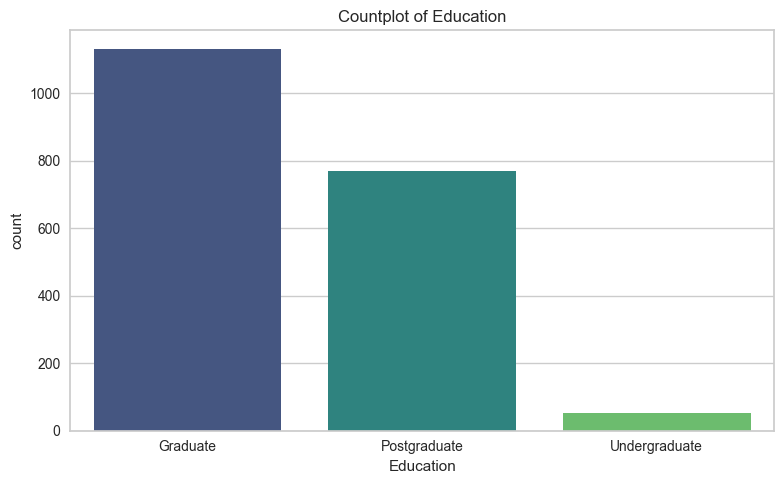

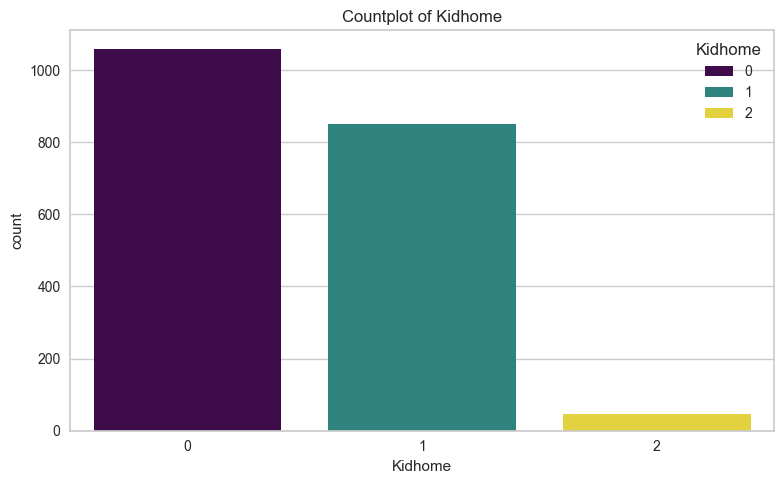

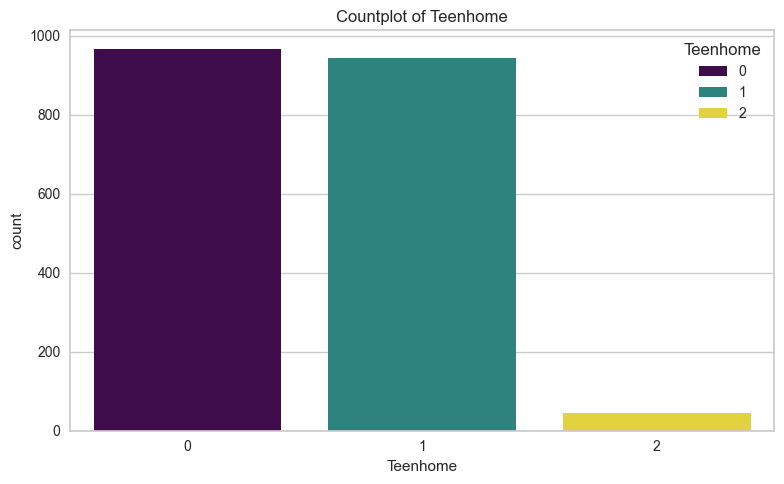

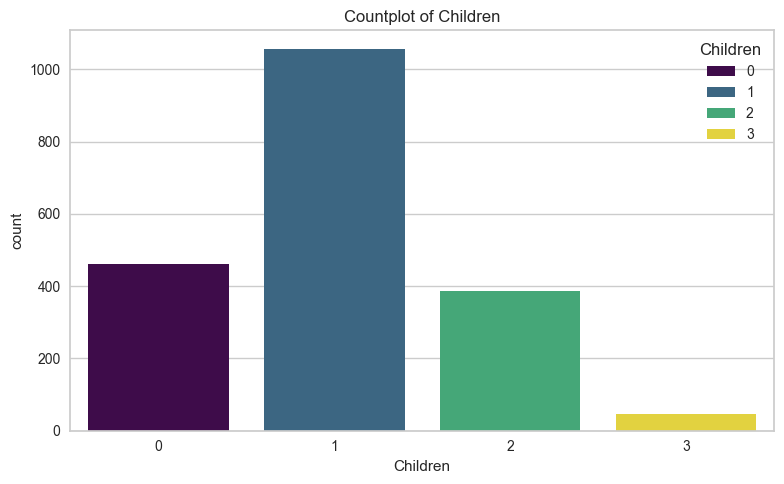

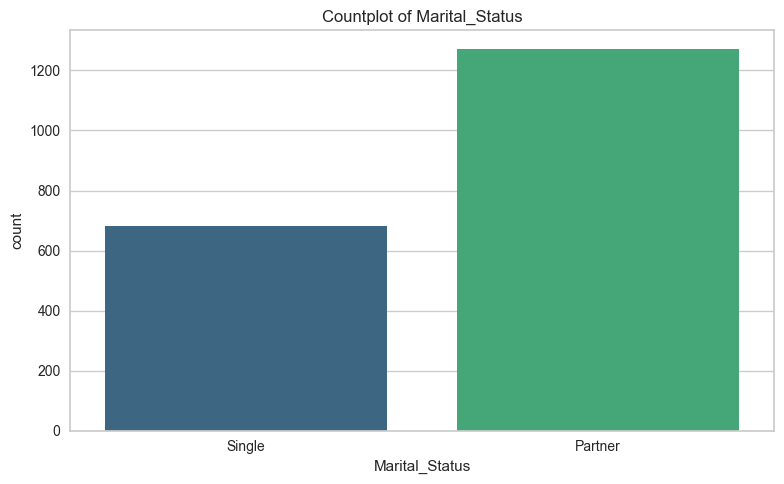

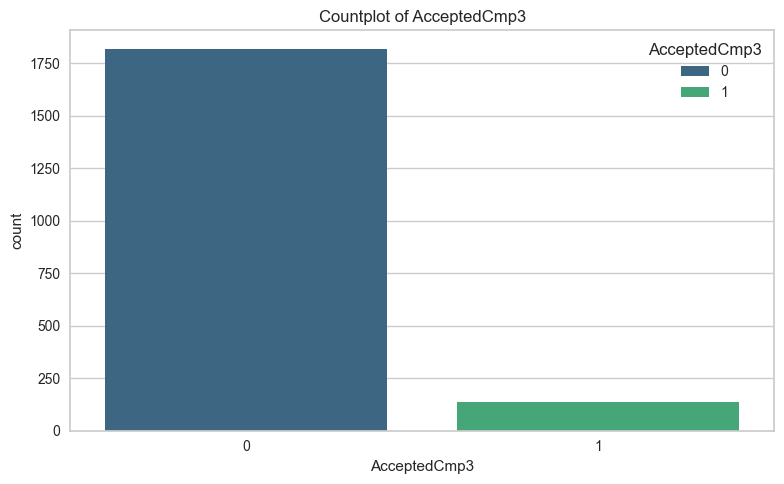

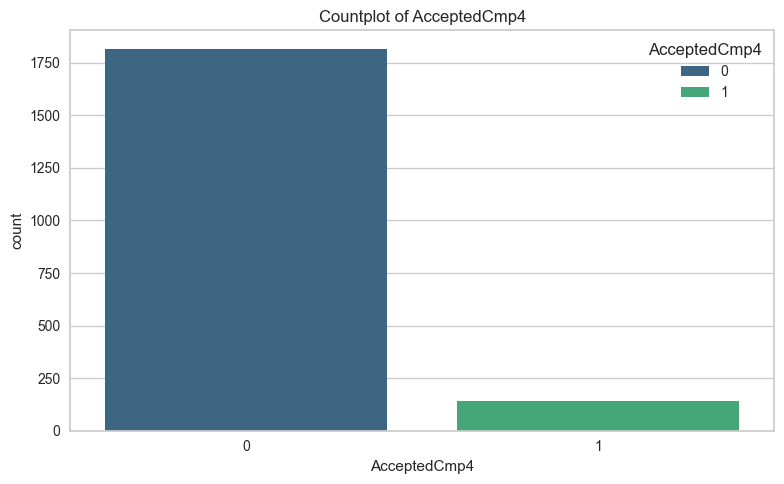

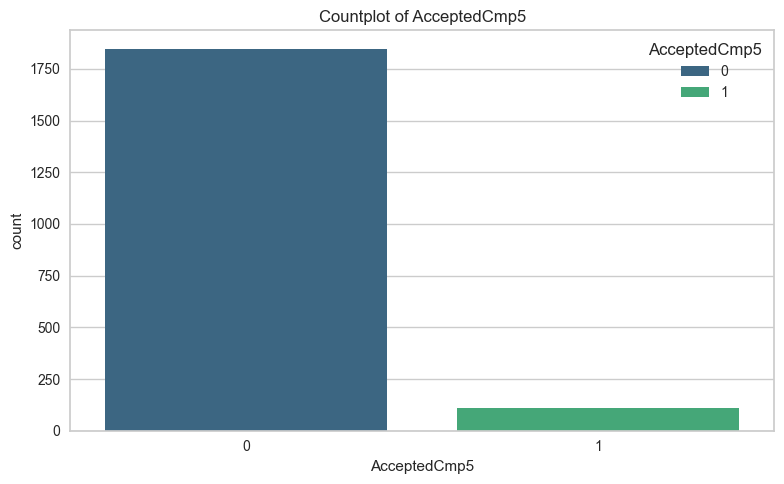

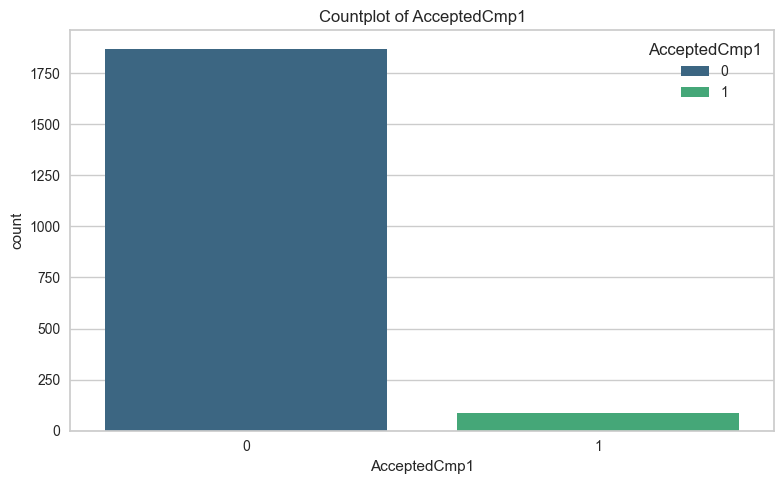

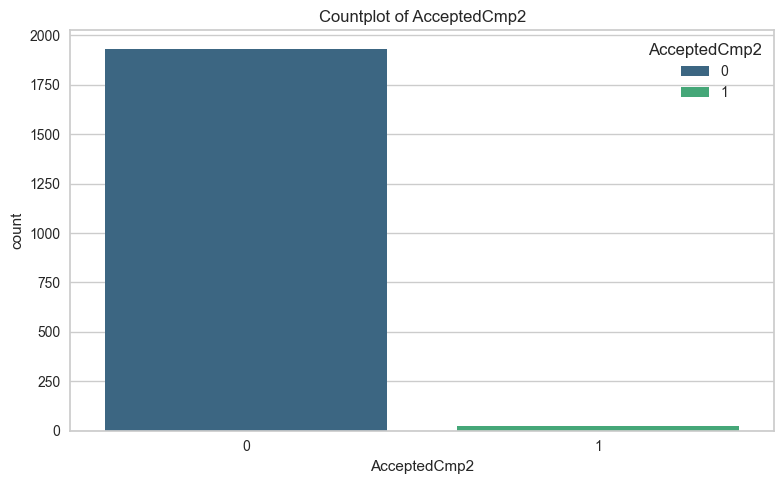

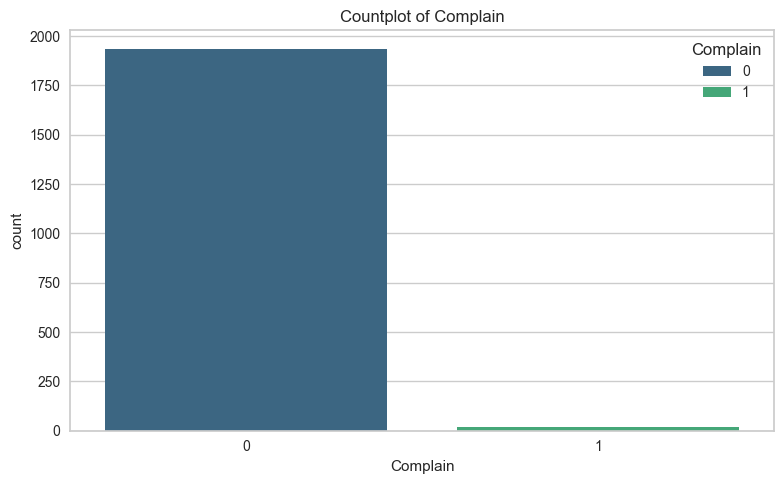

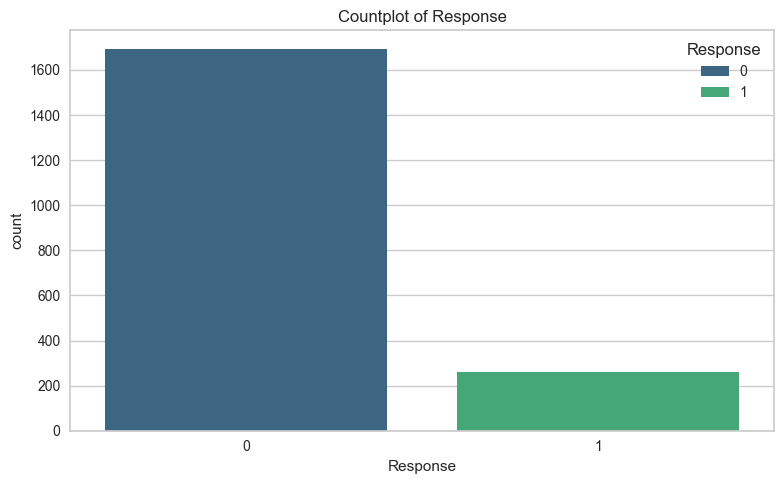

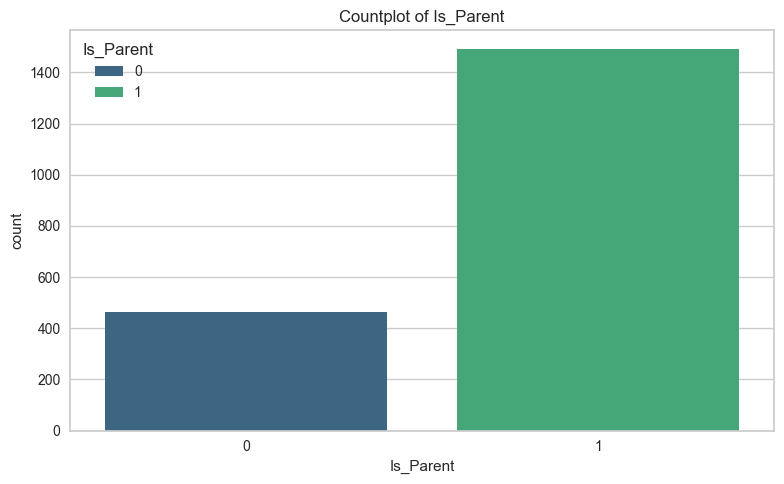

In [610]:
# Plot countplots for each categorical column
for column in categorical_columns + binary_columns:
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=column, hue = column, palette = 'viridis')
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

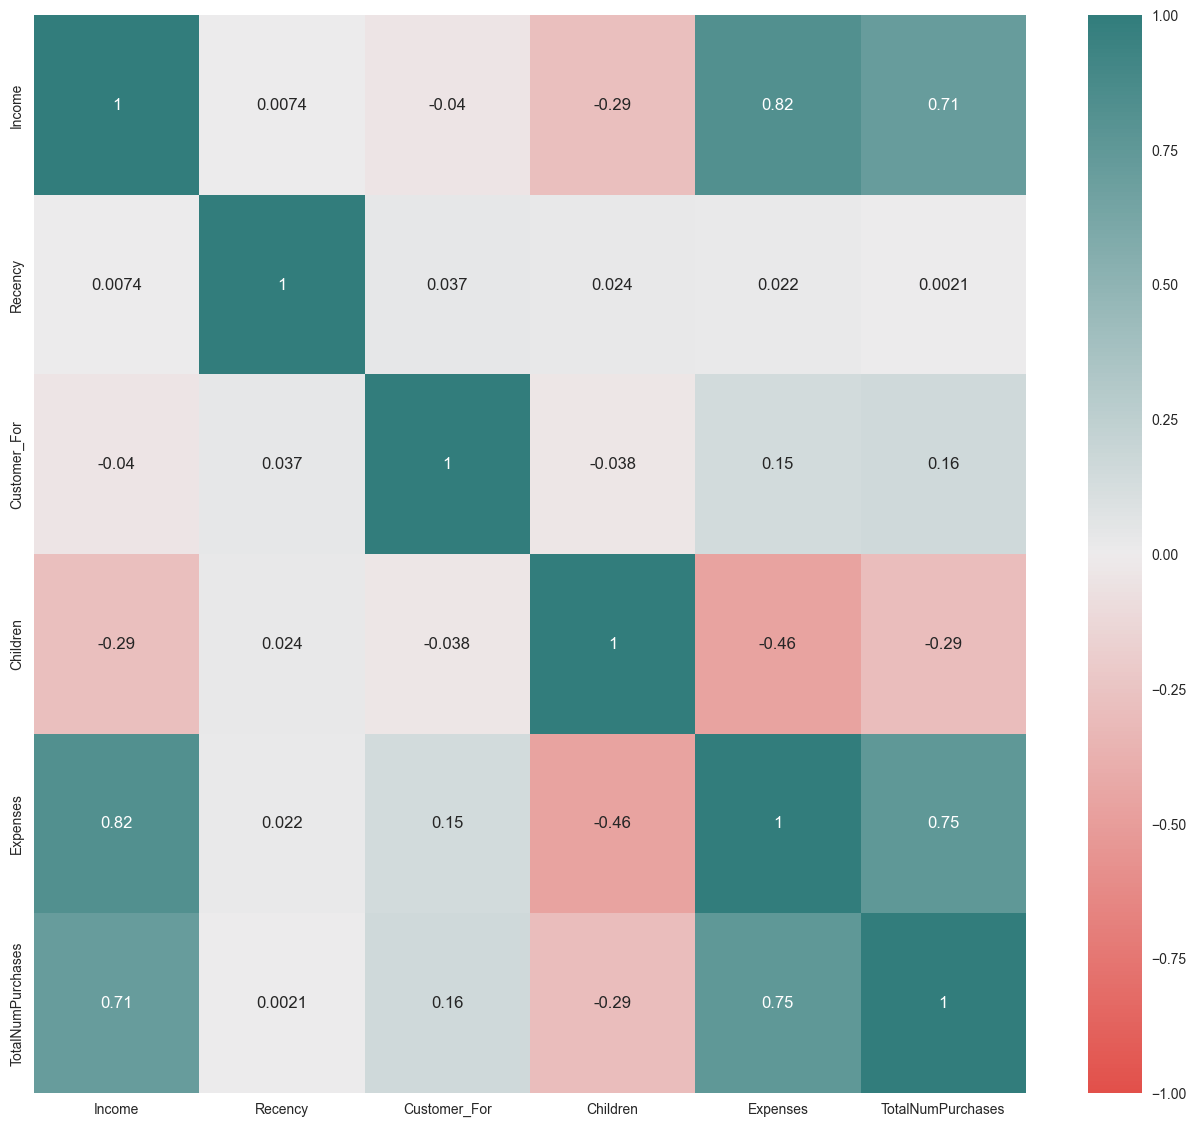

In [611]:
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

cols = ['Income', 'Recency', 'Customer_For', 'Children', 'Expenses', 'TotalNumPurchases']
corr_df = data[cols].corr(numeric_only = True)
# Plotting the heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_df, cmap = cmap, center=0, vmin=-1, annot=True)
plt.show()

# 5. Data Preprocessing

In [ ]:
# Making A Copy Of The Data Before Transformation
scaled_data = data.copy()
scaler = StandardScaler() 
scaled_data[numerical_columns] = scaler.fit_transform(scaled_data[numerical_columns])

In [ ]:
# Converting Categories into Numbers 
# Label encoder can only be applied on 1 column at a time 

label_encoder = LabelEncoder()

for column in scaled_data.select_dtypes('object').columns:
    scaled_data[column] = label_encoder.fit_transform(scaled_data[column])

# 6. Dimensionality Reduction

In [615]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1952.0,1.710835e-16,2.851801,-3.689807,-2.552526,-0.841339,2.436880,8.389287
col2,1952.0,-1.456030e-17,1.476621,-3.992047,-1.009470,-0.206798,0.945945,4.967448
col3,1952.0,-5.096106e-17,1.162634,-3.614955,-0.816453,0.010205,0.828174,3.073669


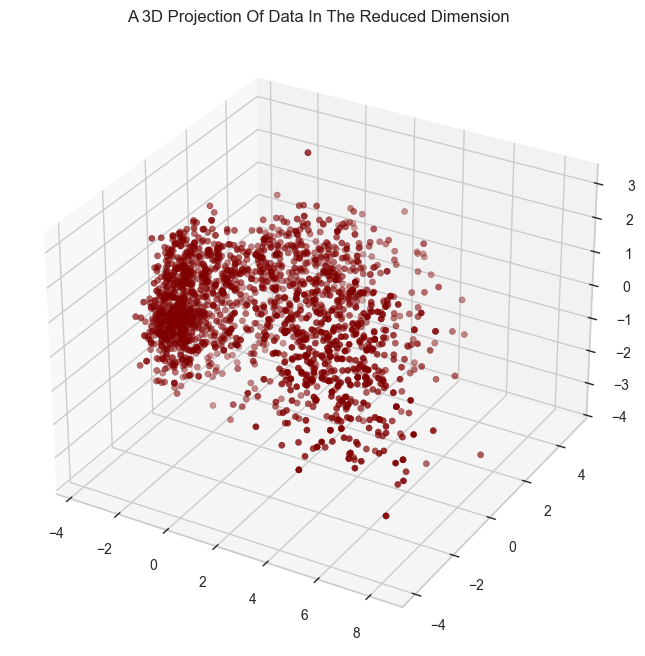

In [616]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# 7. K-Means Clustering 

Elbow Method to determine the number of clusters to be formed:


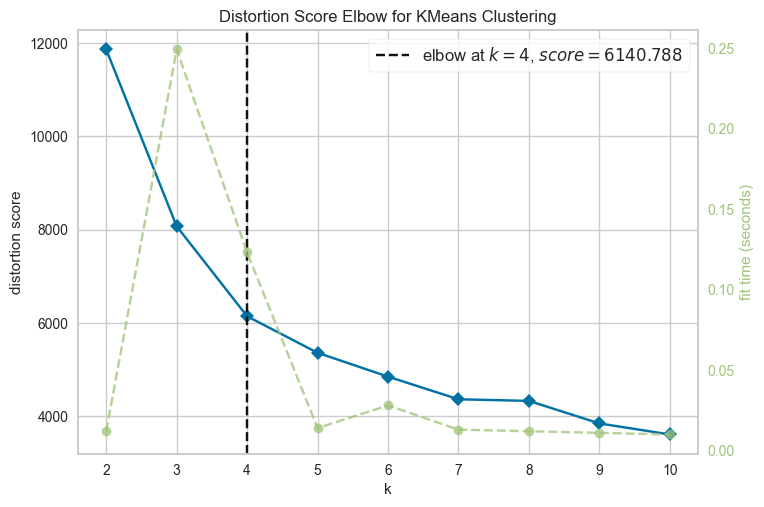

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
# Finding The Optimal Number Of Clusters 
print('Elbow Method to determine the number of clusters to be formed:')
# random_state is set so that k_means doesn't randomly initializes the centroid and we get the same result each time  
Elbow_M = KElbowVisualizer(KMeans(random_state = 12345), k=10)
Elbow_M.fit(PCA_ds)
k = int(Elbow_M.elbow_value_)
Elbow_M.show()

In [654]:
#Initiating the KMeans Clustering model 
kc = KMeans(n_clusters = k, max_iter = 300, random_state = 12345)
# fit model and predict clusters
yhat_KC = kc.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_KC

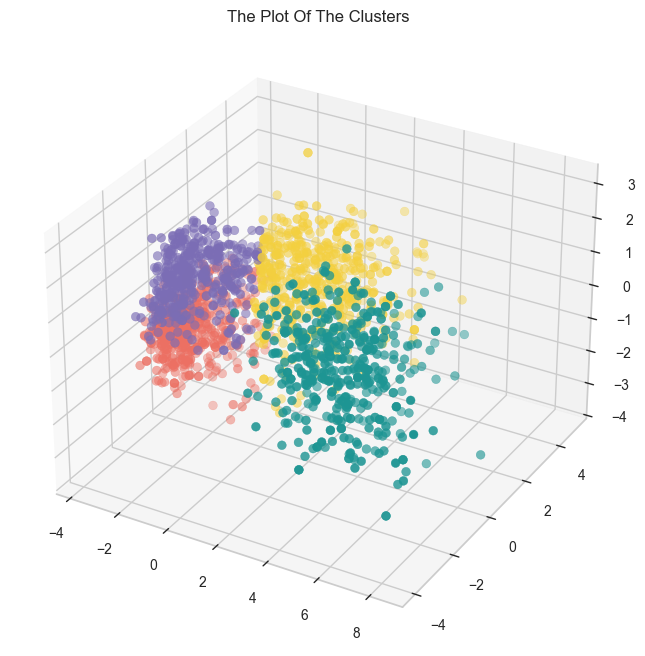

In [655]:
#Plotting the clusters
hex_colours = ['#ec7063', '#17a589', '#2874a6', '#a569bd', '#f4d03f']
colours = LinearSegmentedColormap.from_list("custom_cmap", hex_colours)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = colours)
ax.set_title("The Plot Of The Clusters")
plt.legend()
plt.show()

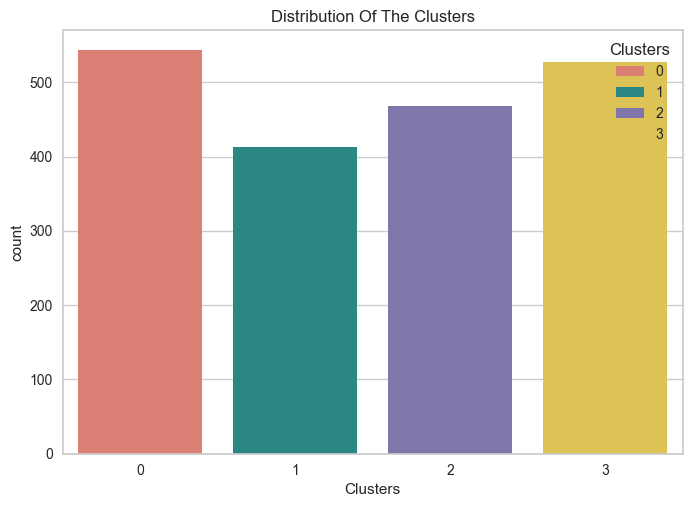

In [656]:
# Distribution of the Clusters 
pl = sns.countplot(x=data["Clusters"], hue = data['Clusters'], palette = colours)
pl.set_title("Distribution Of The Clusters")
plt.show()

# 8. Profiling

In [ ]:
# Average Values For Some Numerical Attributes
for i in range(k): 
    print(f'Average Values For Cluster {i}')
    for column in ['Income', 'Expenses', 'TotalNumPurchases', 'NumDealsPurchases', 'NumCatalogPurchases']:
        print(f'Average {column} = ', round(float(data[column][data['Clusters'] == i].describe()['mean']), 3))
    print('\n')

Average Values For Cluster 0
Average Income =  28693.639
Average Expenses =  85.28
Average TotalNumPurchases =  5.118
Average NumDealsPurchases =  2.041
Average NumCatalogPurchases =  0.46


Average Values For Cluster 1
Average Income =  74331.768
Average Expenses =  1288.034
Average TotalNumPurchases =  14.138
Average NumDealsPurchases =  1.368
Average NumCatalogPurchases =  5.714


Average Values For Cluster 2
Average Income =  42335.635
Average Expenses =  111.976
Average TotalNumPurchases =  5.641
Average NumDealsPurchases =  1.825
Average NumCatalogPurchases =  0.718


Average Values For Cluster 3
Average Income =  56616.591
Average Expenses =  687.972
Average TotalNumPurchases =  13.784
Average NumDealsPurchases =  3.703
Average NumCatalogPurchases =  2.902




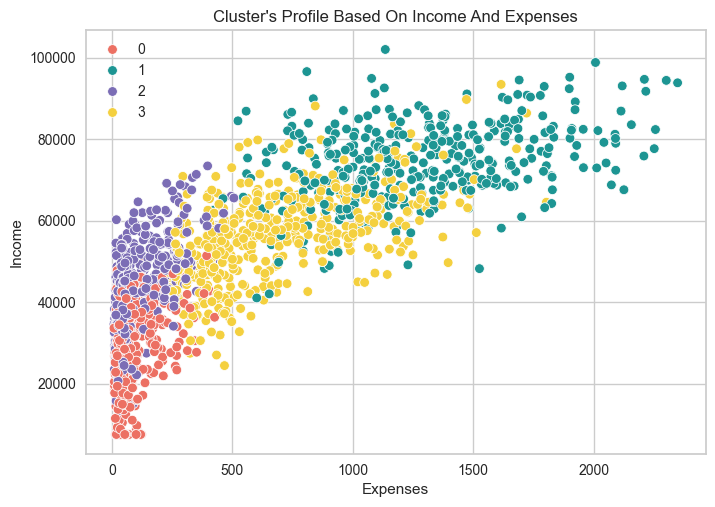

In [ ]:
# Expense Vs Income Scatterplot
pl = sns.scatterplot(data = data,x=data["Expenses"], y=data["Income"],hue=data["Clusters"], palette= colours)
pl.set_title("Cluster's Profile Based On Income And Expenses")
plt.legend()
plt.show()

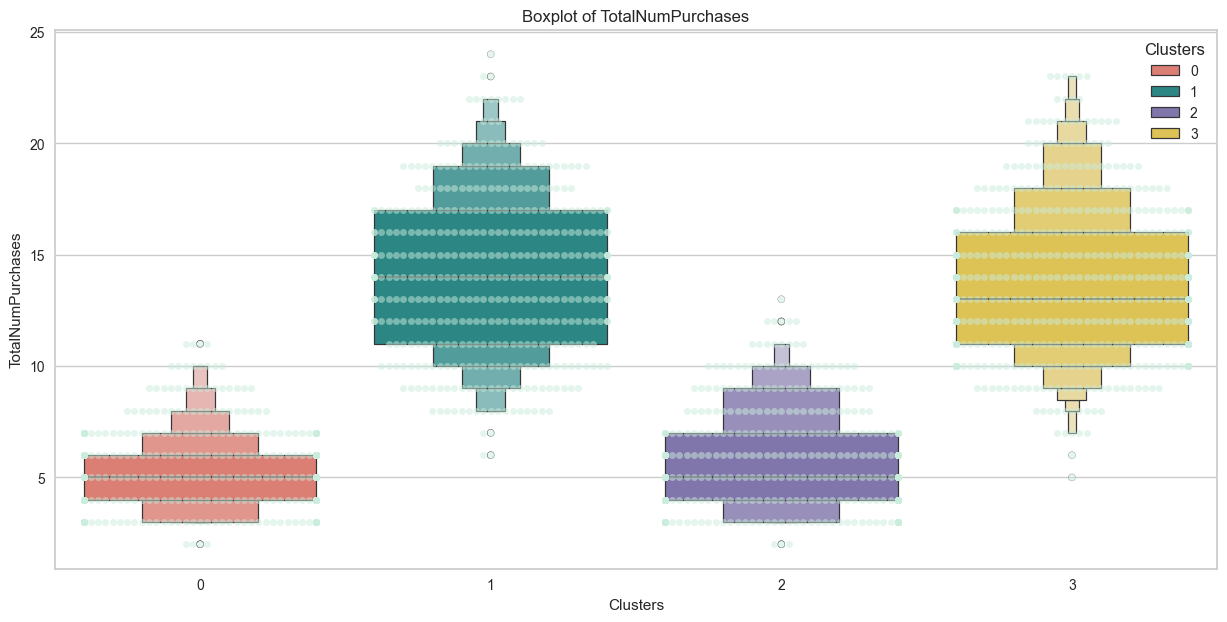

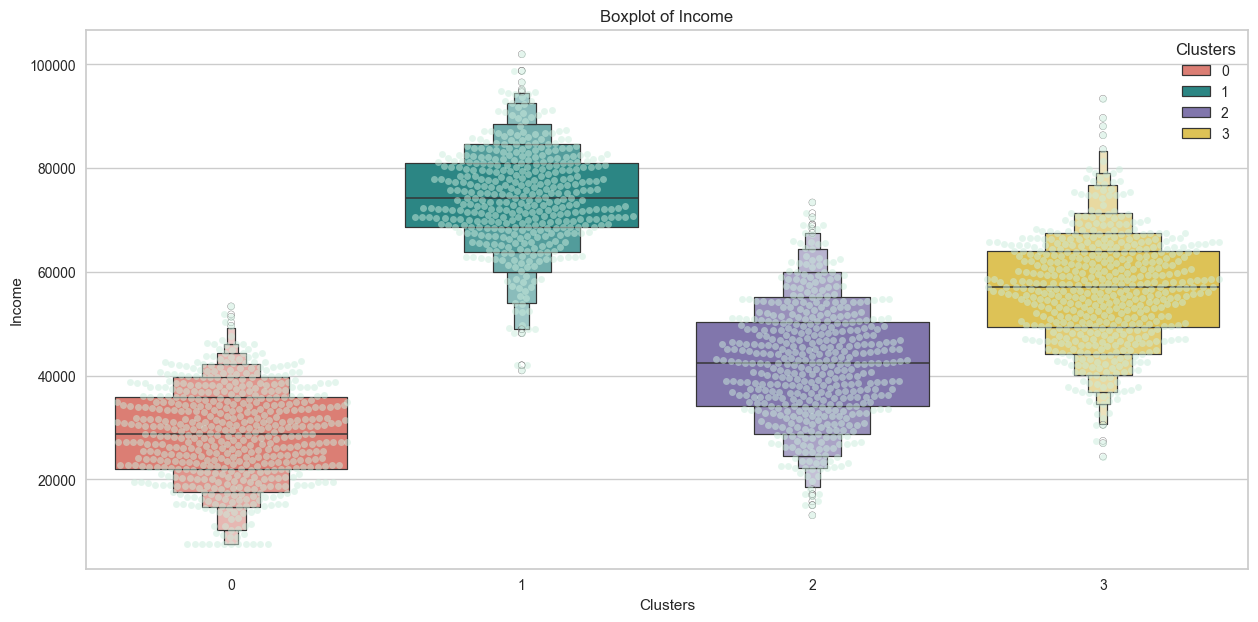

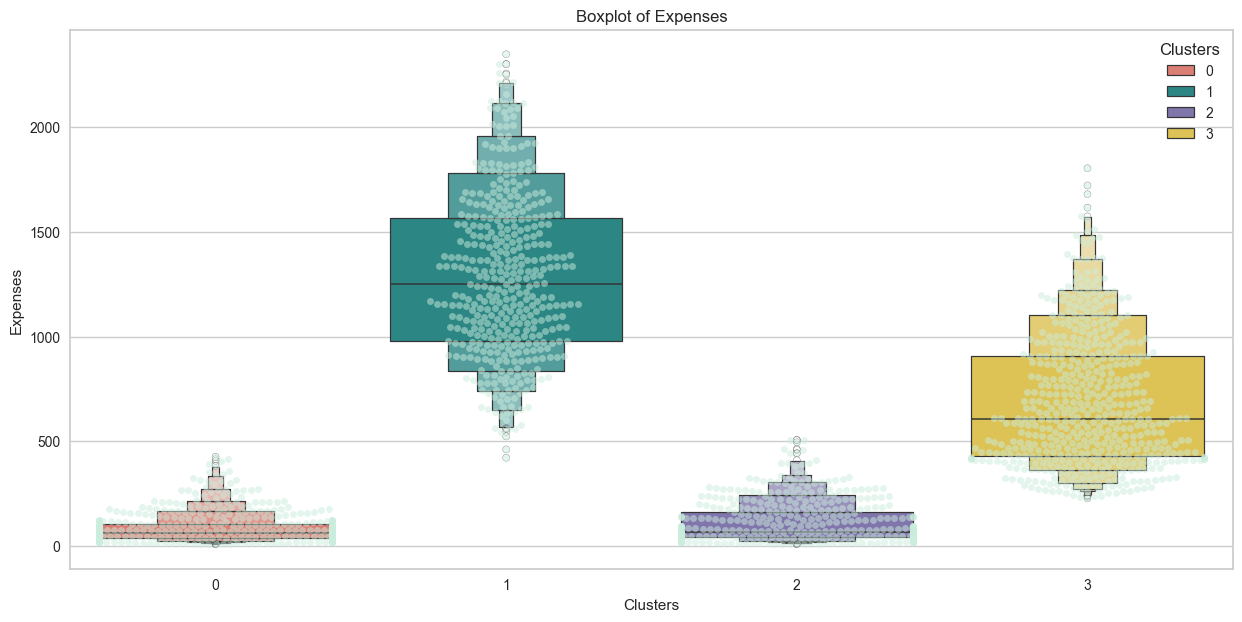

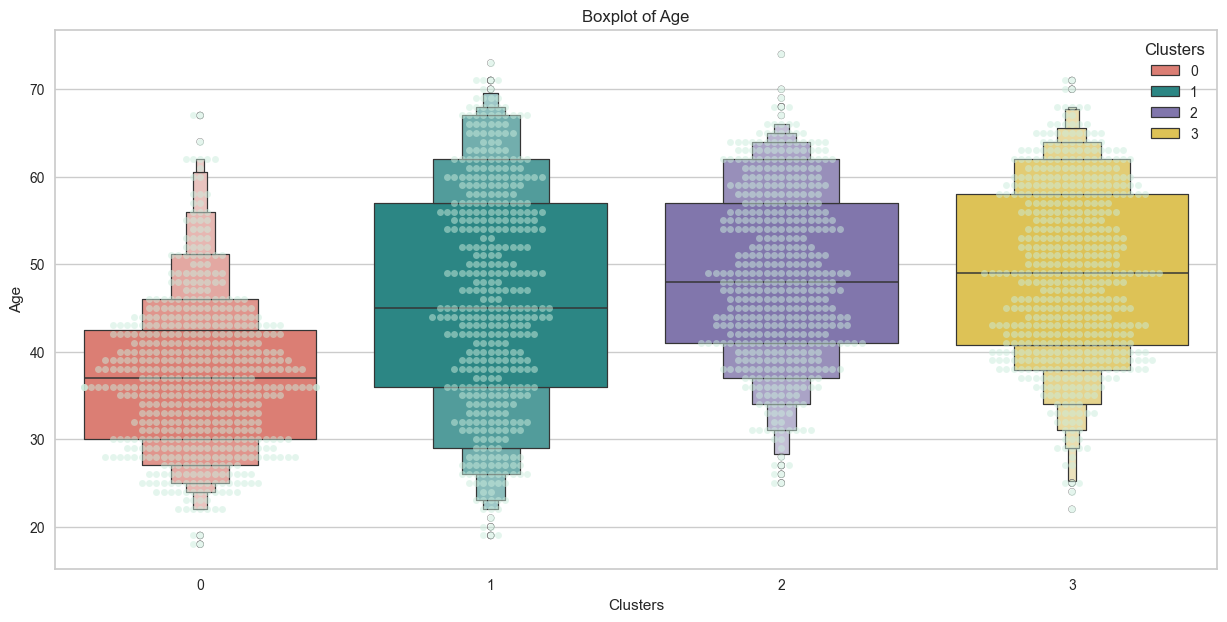

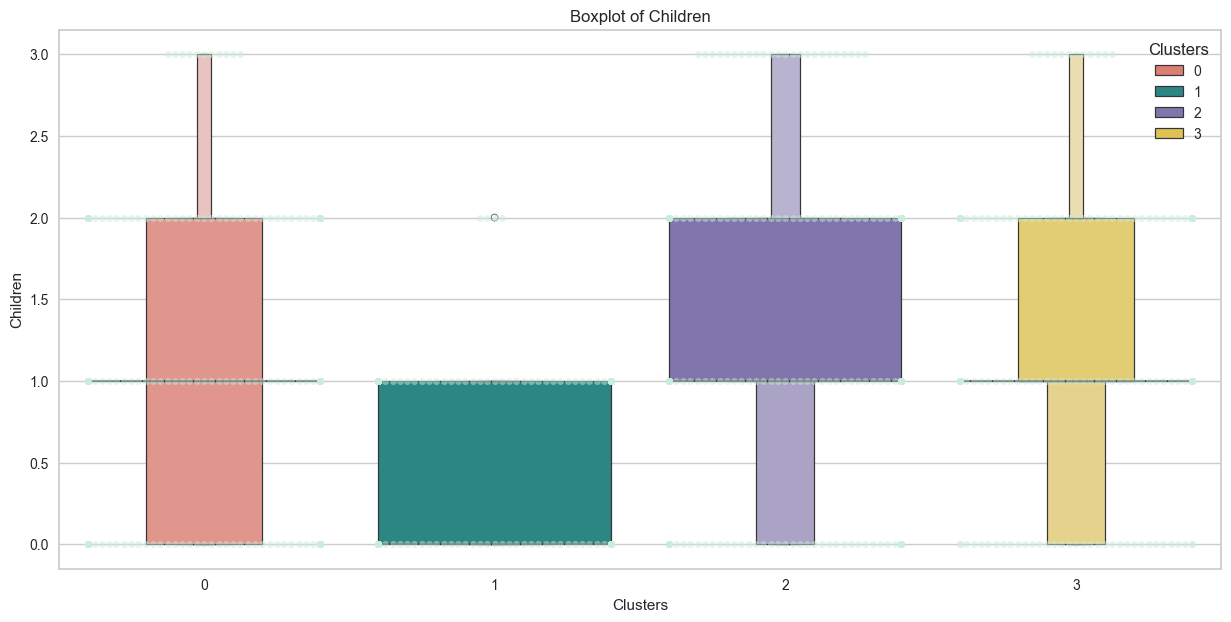

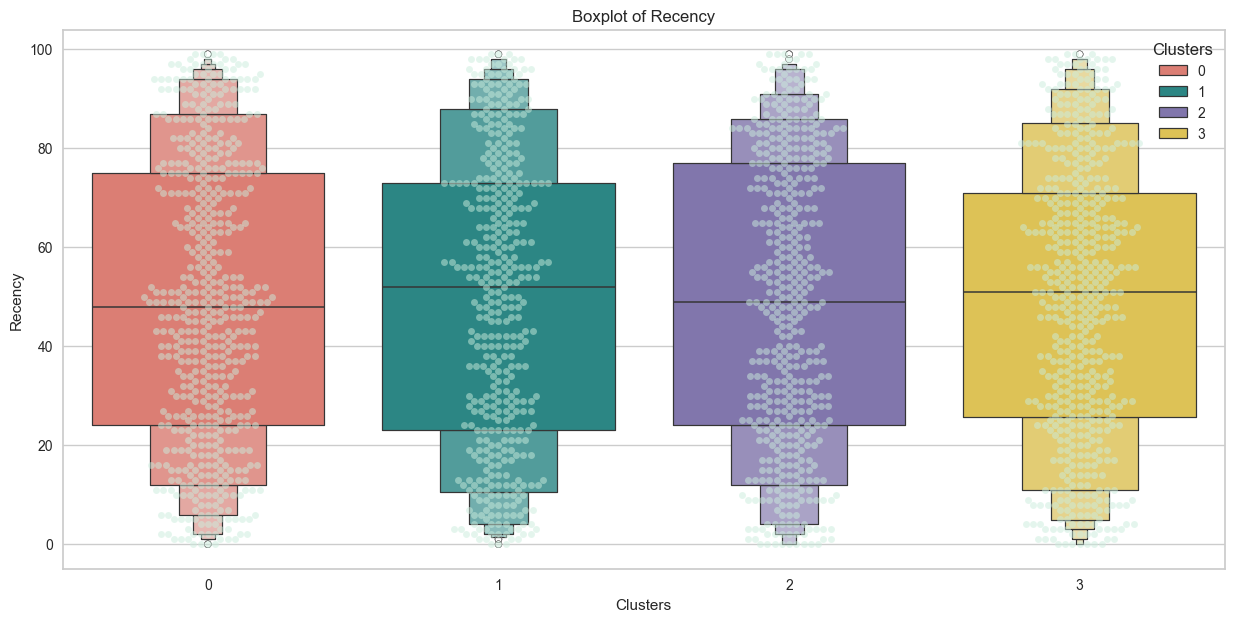

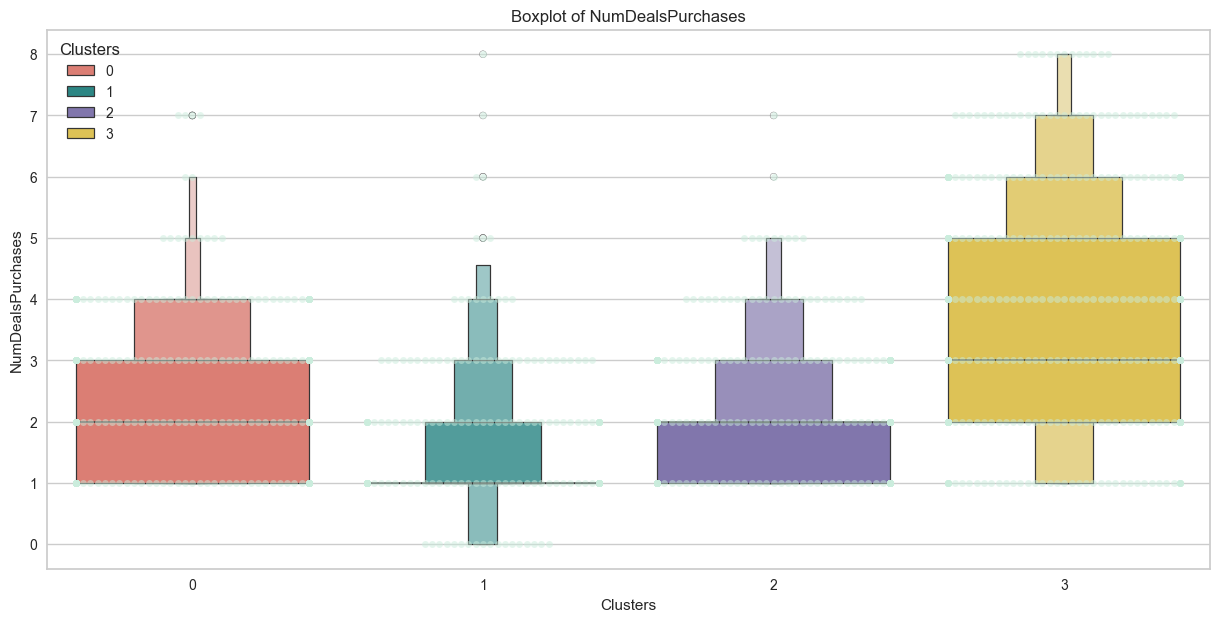

In [658]:
#Plotting boxplots for Numerical Attributes
for column in ['TotalNumPurchases', 'Income', 'Expenses', 'Age', 'Children', 'Recency', "NumDealsPurchases"]:
    plt.figure(figsize = (15, 7))
    pl=sns.swarmplot(x=data["Clusters"], y=data[column], color= "#CBEDDD", alpha=0.5)
    pl=sns.boxenplot(x = data["Clusters"], y = data[column], hue = data['Clusters'], palette= colours)
    pl.set_title(f'Boxplot of {column}')
    plt.show()

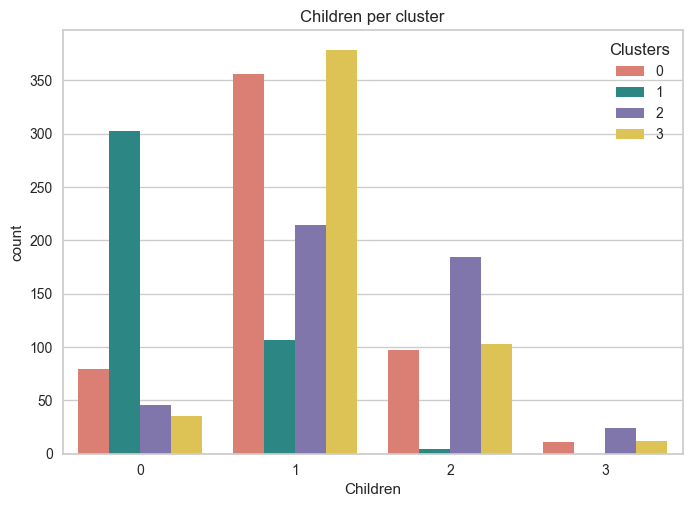

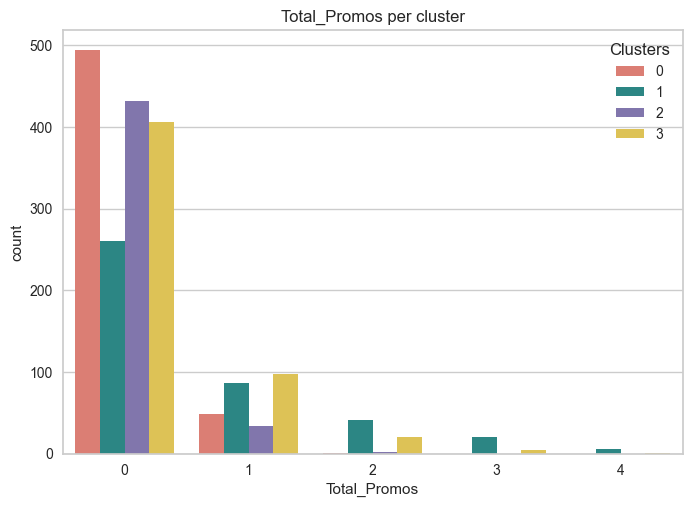

In [ ]:
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
for column in ['Children', 'Total_Promos']:
    plt.figure()
    sns.countplot(x = data[column], hue = data['Clusters'], palette = colours)
    plt.title(f'{column} per cluster')

In [660]:
df_clusters = data.copy()
print(df_clusters.groupby(['Clusters', 'Marital_Status']).size())
print('\n')
print(df_clusters.groupby(['Clusters', 'Marital_Status']).size().unstack())

Clusters  Marital_Status
0         Partner           355
          Single            188
1         Partner           260
          Single            153
2         Partner           303
          Single            165
3         Partner           352
          Single            176
dtype: int64


Marital_Status  Partner  Single
Clusters                       
0                   355     188
1                   260     153
2                   303     165
3                   352     176


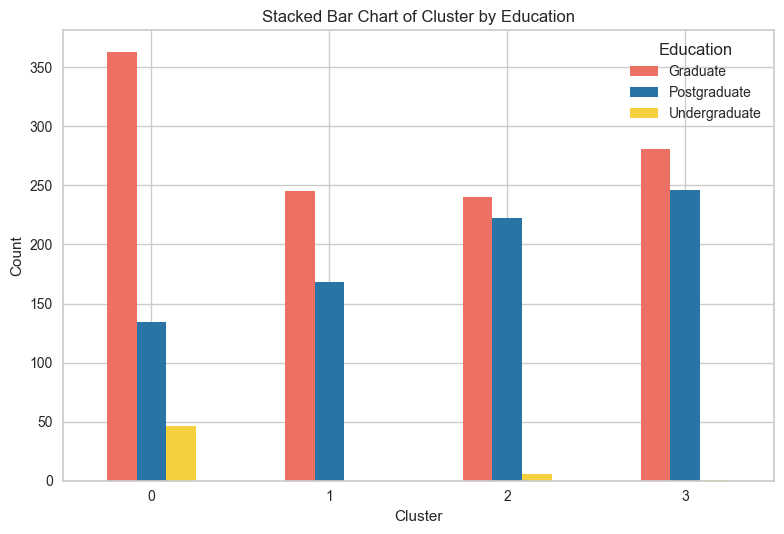

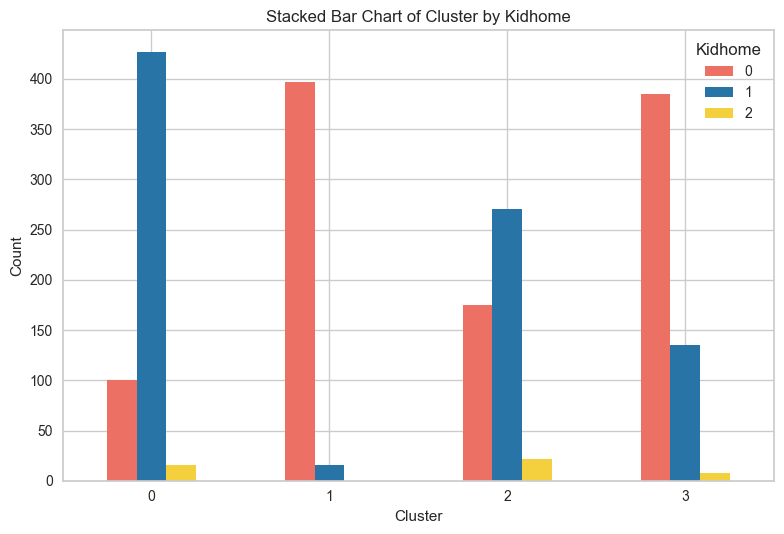

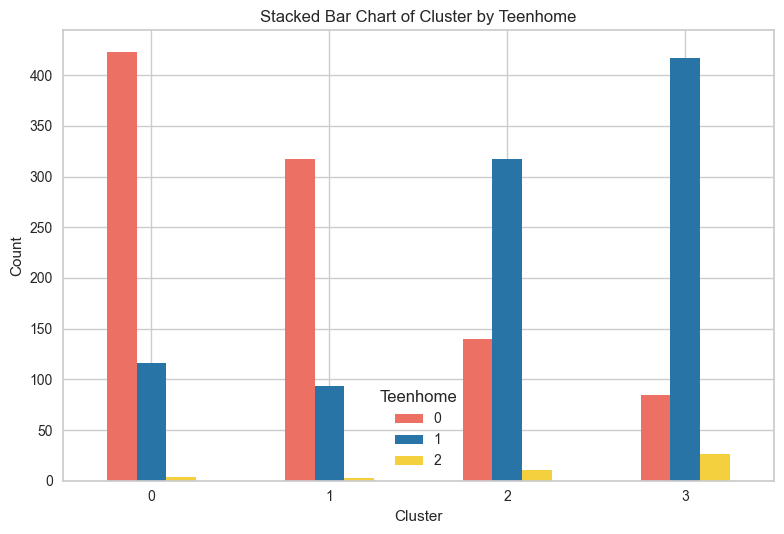

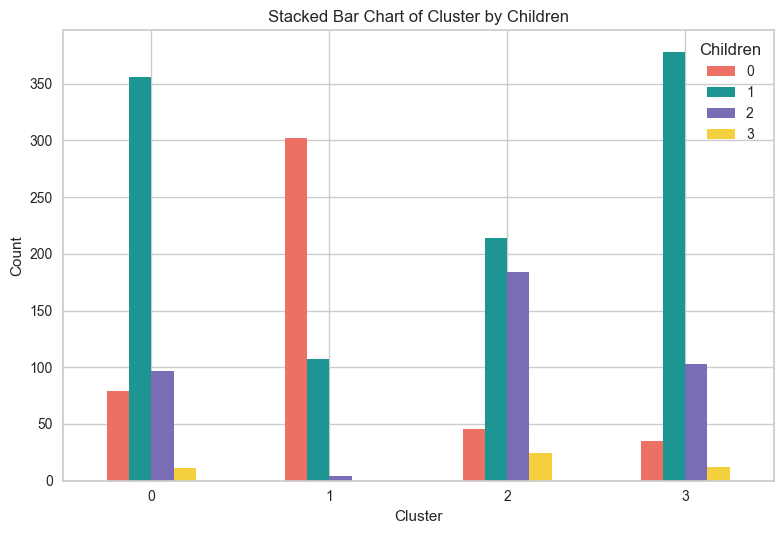

In [661]:
# Categorical attribute per clusters
for column in categorical_columns:
    df_clusters.groupby(['Clusters', column]).size().unstack().plot(kind = 'bar', cmap = colours)
    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout() # Adjust layout to fit labels
    plt.show()